## Classify the Size_Categorie using SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

In [2]:
df=pd.read_csv("/content/forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [3]:
df.shape

(517, 31)

In [4]:
df.duplicated().sum()

8

In [5]:
df=df.drop_duplicates()

In [6]:
df.shape

(509, 31)

In [7]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [12]:
df[df.columns[0:11]].describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,509.0,90.618075,5.555527,18.7,90.2,91.60,92.90,96.20
DMC,509.0,110.235756,63.804112,1.1,62.3,108.30,141.30,291.30
DC,509.0,547.787623,248.196222,7.9,437.7,664.20,713.90,860.60
ISI,509.0,9.023576,4.585083,0.0,6.4,8.40,11.00,56.10
temp,509.0,18.865422,5.841083,2.2,15.4,19.30,22.80,33.30
RH,509.0,44.253438,16.365192,15.0,32.0,42.00,53.00,100.00
wind,509.0,4.011395,1.800926,0.4,2.7,4.00,4.90,9.40
rain,509.0,0.020432,0.296261,0.0,0.0,0.00,0.00,6.40
area,509.0,12.992908,64.133357,0.0,0.0,0.61,6.58,1090.84


In [10]:
corr = df[df.columns[0:11]].corr()

In [11]:
corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000


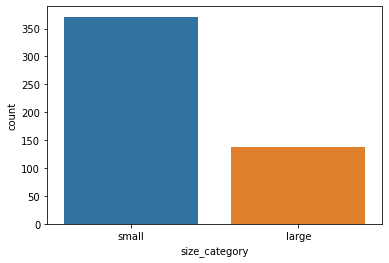

In [25]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(data=df,x=df['size_category'])
plt.show()

In [26]:
df.head(2)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small


In [27]:
df=df.iloc[:,2:]

In [28]:
df.head(2)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small


In [29]:
le=LabelEncoder()

In [31]:
df.size_category=le.fit_transform(df.size_category)

In [33]:
df.size_category.value_counts()

1    371
0    138
Name: size_category, dtype: int64

In [34]:
X= df.iloc[:,:-1]
y=df.iloc[:,-1]

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((407, 28), (102, 28), (407,), (102,))

## 1. Using Linear

In [39]:
li_model=SVC(kernel="linear")
li_model.fit(X_train,y_train)
y_pred= li_model.predict(X_test)
li_acc=accuracy_score(y_test,y_pred)
print(li_acc)

0.9705882352941176


# 2 Using Poly

In [42]:
poly_model=SVC(kernel="poly")
poly_model.fit(X_train,y_train)
y_pred= poly_model.predict(X_test)
poly_acc=accuracy_score(y_test,y_pred)
print(poly_acc)

0.7843137254901961


## 3.Using RBF

In [44]:
rbf_model=SVC(kernel="rbf")
rbf_model.fit(X_train,y_train)
y_pred= rbf_model.predict(X_test)
rbf_acc=accuracy_score(y_test,y_pred)
print(rbf_acc)

0.7647058823529411


## 4. Using Sigmoid

In [45]:
sig_model=SVC(kernel="sigmoid")
sig_model.fit(X_train,y_train)
y_pred= sig_model.predict(X_test)
sig_acc=accuracy_score(y_test,y_pred)
print(sig_acc)

0.696078431372549


In [46]:
acc=[li_acc,poly_acc,rbf_acc,sig_acc]

In [47]:
Results=pd.DataFrame({"Model":["Linear","Poly",'RBF','Sigmoid'],'Accuracy':acc})

In [48]:
Results['Accuracy']=Results['Accuracy'].apply(lambda x: str(round(x*100,2)) + " %")
Results

,Model,Accuracy
0,Linear,97.06 %
1,Poly,78.43 %
2,RBF,76.47 %
3,Sigmoid,69.61 %


# Conclusion: Linear Model has give most accurate prediction with 97.06% Accuracy